In [ ]:
# Raw Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data Source
import yfinance as yf
import yahoo_fin.stock_info as si

#Data viz


import plotly.graph_objs as go

df = []
df2 = []
df3 = []
df4 = []
df5 = []
df6 = []

S_P = si.tickers_sp500()

K =  S_P[0:200];
for i in K:
    
    data = yf.download(tickers= i , period='1d', interval='1d')
    df.append(data)
    
    data2 = yf.download(tickers= i , period='1mo', interval='1d')
    today = data2['Close'][-1]
    yesterday = data2['Close'][-2]
    daily = (today - yesterday)/yesterday *100
    df3.append(daily);
    
    data3 = yf.download(tickers= i , period='1mo', interval='1wk')
    thisweek = data3['Close'][-2]
    lastweek = data3['Close'][-3]
    weekly = (thisweek-lastweek)/lastweek *100
    df4.append(weekly);
    
    # #30day
    data4 = yf.download(tickers= i , period='3mo', interval='1mo')
    thismonth = data4['Close'][-2]
    lastmonth = data4['Close'][-3]
    monthly = (thismonth-lastmonth)/lastmonth*100
    df5.append(monthly);
    
    
    data5 = yf.download(tickers= i , period='1d', interval='1h')
    thishour = data5['Close'][-1]
    lasthour = data5['Close'][-2]
    hourly = (thishour-lasthour)/lasthour*100
    df6.append(hourly);


for j in K:
    income = si.get_income_statement(j);
    df2.append(income.loc["grossProfit"][0]);


result = pd.concat(df, ignore_index=True)
result.insert(loc=0, column='SYMBOL', value=K)
result['Gross Profit'] = df2
result['percentage_chng_24h'] = df3
result['percentage_chng_7d'] = df4
result['percentage_chng_30d'] = df5
result['percentage_chng_1h'] = df6
result.to_csv('/Users/simrahshaik/Downloads/stocks.csv')

# hj = result.to_csv('sto.csv')
# hj
# result['Close']


#---------------------------------------------------------------------------------------------------------

# data = yf.download(tickers= 'FB' , period='1mo', interval='1d')

# today = data['Close'][-1]
# yesterday = data['Close'][-2]
# daily = (today - yesterday)/yesterday *100 # daily percentage change
# daily


#---------------------------------------------------------------------------------------------------------
# #7day
# data2 = yf.download(tickers= 'FB' , period='1mo', interval='1wk')
# thisweek = data2['Close'][-1]
# lastweek = data2['Close'][-2]
# weekly = (thisweek-lastweek)/lastweek *100
# # weekly


#---------------------------------------------------------------------------------------------------------
# #30day
# data3 = yf.download(tickers= 'FB' , period='3mo', interval='1mo')
# thismonth = data3['Close'][-3]
# lastmonth = data3['Close'][-2]
# monthly = (thismonth-lastmonth)/lastmonth*100
# monthly


#---------------------------------------------------------------------------------------------------------
# #1hr

# data4 = yf.download(tickers= 'FB' , period='1d', interval='1h')
# thishour = data4['Close'][-2]
# lasthour = data4['Close'][-1]
# hourly = (thishour-lasthour)/lasthour*100
# hourly

In [7]:
df = pd.read_csv("stocks.csv")

print('Shape of data: {}'.format(df.shape))
print(df.describe())
by_price = df.sort_values('Open', ascending = False)
print()
display(by_price.iloc[:1])
print('Amazon is most expensive share in SP500')
print()
print('These are 5 tickers with highest gross profit in SP500')
by_gross_profit = df.sort_values('Gross Profit', ascending = False)
display(by_gross_profit.iloc[:5])

Shape of data: (200, 13)
       Unnamed: 0         Open         High          Low        Close  \
count  200.000000   199.000000   199.000000   199.000000   199.000000   
mean    99.500000   215.968612   217.922504   213.495145   215.276432   
std     57.879185   367.969997   372.422192   364.173663   366.334437   
min      0.000000    12.380000    12.450000    12.335000    12.390000   
25%     49.750000    69.372501    70.174999    68.340000    69.584999   
50%     99.500000   119.290001   120.605003   118.360001   120.349998   
75%    149.250000   227.674995   231.514999   226.247498   228.985001   
max    199.000000  3537.000000  3593.879883  3525.820068  3545.679932   

         Adj Close        Volume  Gross Profit  percentage_chng_24h  \
count   199.000000  1.990000e+02  2.000000e+02           199.000000   
mean    215.276432  4.006747e+06  9.277782e+09             0.171592   
std     366.334437  9.071650e+06  1.900405e+10             1.626213   
min      12.390000  5.670000e+04 

,Unnamed: 0,SYMBOL,Open,High,Low,Close,Adj Close,Volume,Gross Profit,percentage_chng_24h,percentage_chng_7d,percentage_chng_30d,percentage_chng_1h
34,34,AMZN,3537.0,3593.879883,3525.820068,3545.679932,3545.679932,2546886.0,152757000000,0.582387,0.175048,4.528485,-0.273947


Amazon is most expensive share in SP500

These are top 5 cryptocurrencies in terms of market cap--


,Unnamed: 0,SYMBOL,Open,High,Low,Close,Adj Close,Volume,Gross Profit,percentage_chng_24h,percentage_chng_7d,percentage_chng_30d,percentage_chng_1h
3,3,AAPL,150.369995,151.880005,149.429993,150.000000,150.000000,55958623.0,152836000000,0.006663,NaN,NaN,-0.146514
34,34,AMZN,3537.000000,3593.879883,3525.820068,3545.679932,3545.679932,2546886.0,152757000000,0.582387,0.175048,4.528485,-0.273947
54,54,BAC,47.259998,47.389999,46.904999,47.049999,47.049999,35335506.0,74208000000,0.298443,-0.127744,-1.820843,-0.275476
100,100,CMCSA,53.450001,53.730000,53.240002,53.380001,53.380001,9970298.0,70443000000,-0.224297,-0.742118,NaN,0.046860
70,70,BRK-B,286.600006,286.839996,284.295013,284.670013,284.670013,3219074.0,69721000000,-0.461547,-0.656529,-0.355395,-0.045637


Text(0.5, 1.0, 'Increase for Over 30 Days')

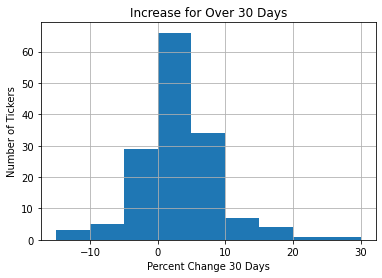

In [10]:
bins_list= [-15,-10,-5,0,5,10,15,20,25,30]
df.hist(column='percentage_chng_30d', bins=bins_list)
plt.xlabel('Percent Change 30 Days')
plt.ylabel('Number of Tickers')
plt.title('Increase for Over 30 Days')